<a href="https://colab.research.google.com/github/Ksobti14/Sign-Language-DetectorCNN/blob/main/Sign_language_DetectorvCNN_Opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil

# Define the path to the .kaggle directory
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
shutil.copy("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

# (Optional) Set permissions if needed
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 99% 1.02G/1.03G [00:09<00:00, 114MB/s]
100% 1.03G/1.03G [00:09<00:00, 121MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/asl-alphabet.zip", "r")
zip_ref.extractall("/content/data")
zip_ref.close()

In [ ]:
import os

# Check the structure
print(os.listdir('/content/data/asl_alphabet_train'))


['nothing', 'Z', 'W', 'V', 'X', 'L', 'I', '.ipynb_checkpoints', 'K', 'M', 'del', 'F', 'O', 'H', 'D', 'A', 'B', 'T', 'G', 'N', 'J', 'Y', 'P', 'space', 'R', 'C', 'U', 'Q', 'S', 'E']


In [ ]:
import shutil
shutil.rmtree('/content/data/asl_alphabet_train/.ipynb_checkpoints')

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values to [0, 1]
    validation_split=0.2  )

In [ ]:



# Create the training and validation generators
train_generator = datagen.flow_from_directory(
    '/content/data/asl_alphabet_train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


val_generator = datagen.flow_from_directory(
    '/content/data/asl_alphabet_train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_classes = len(val_generator.class_indices)
print("Number of classes:", num_classes)


Number of classes: 29


In [ ]:
history=model.fit(train_generator,epochs=2,validation_data=val_generator)

Epoch 1/2
2175/2175 [==============================] - 464s 212ms/step - loss: 1.2691 - accuracy: 0.6091 - val_loss: 1.0873 - val_accuracy: 0.6447
Epoch 2/2
2175/2175 [==============================] - 446s 205ms/step - loss: 0.3483 - accuracy: 0.8810 - val_loss: 0.9745 - val_accuracy: 0.7014


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread("/content/data/asl_alphabet_train/I/I1.jpg")

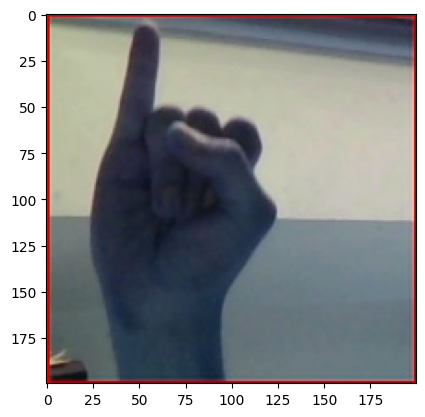

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(64,64))

In [ ]:
test_input=test_img.reshape((1,64,64,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 119ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
model.save('path/to/your/saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Load the model
model = load_model('path/to/your/saved_model.h5')


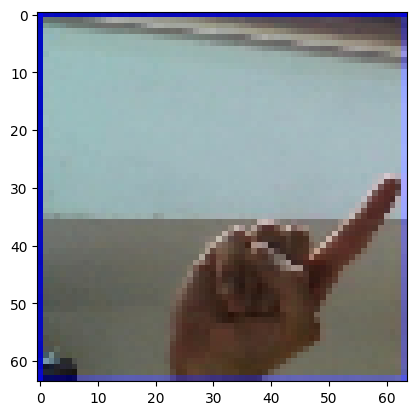

1/1 [==============================] - 0s 95ms/step
Predicted Class: 25
Predicted Label: Z


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load the trained model
model = load_model('path/to/your/saved_model.h5')

# Load and preprocess the image
img_path = '/content/data/asl_alphabet_train/Z/Z100.jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Adjust target_size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Scale pixel values

# Debug: Visualize the image to ensure it's loaded correctly
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted Class: {predicted_class[0]}')

# Assuming you have a list of class labels
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','del','nothing','space']

# Get the predicted label
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted Label: {predicted_label}')


1/1 [==============================] - 0s 98ms/step
Image: /content/data/asl_alphabet_test/asl_alphabet_test/A_test.jpg, Predicted Label: A
Image: /content/data/asl_alphabet_train/S/S1.jpg, Predicted Label: S
Image: /content/data/asl_alphabet_test/asl_alphabet_test/C_test.jpg, Predicted Label: C
Image: /content/data/asl_alphabet_test/asl_alphabet_test/H_test.jpg, Predicted Label: H


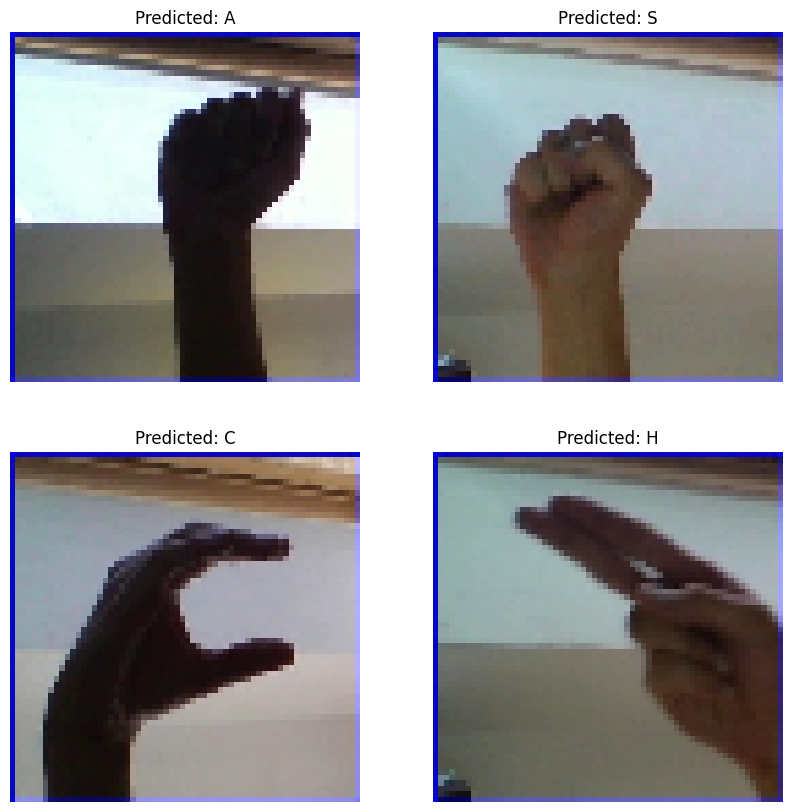

In [ ]:
# Load and preprocess multiple images for batch prediction
img_paths = [
    '/content/data/asl_alphabet_test/asl_alphabet_test/A_test.jpg',
    '/content/data/asl_alphabet_train/S/S1.jpg',
    '/content/data/asl_alphabet_test/asl_alphabet_test/C_test.jpg',
    '/content/data/asl_alphabet_test/asl_alphabet_test/H_test.jpg'
]

img_arrays = []
for path in img_paths:
    img = image.load_img(path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    img_arrays.append(img_array)

batch_array = np.vstack(img_arrays)

# Make predictions
predictions = model.predict(batch_array)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[i] for i in predicted_classes]

# Print results
for i, path in enumerate(img_paths):
    print(f'Image: {path}, Predicted Label: {predicted_labels[i]}')

# Debug: Visualize the images and predictions
plt.figure(figsize=(10, 10))
for i, path in enumerate(img_paths):
    img = image.load_img(path, target_size=(64, 64))
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()
